# Data Preprocessing

In [ ]:
!nvidia-smi

Sat Apr 13 13:05:36 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Using {torch.cuda.get_device_name(device)}")
else:
    device = torch.device("cpu")
    print("GPU not available, using CPU")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Using Tesla T4


In [ ]:
# Load MNIST dataset
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target.astype(int)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


11490434/11490434 [==============================] - 0s 0us/step


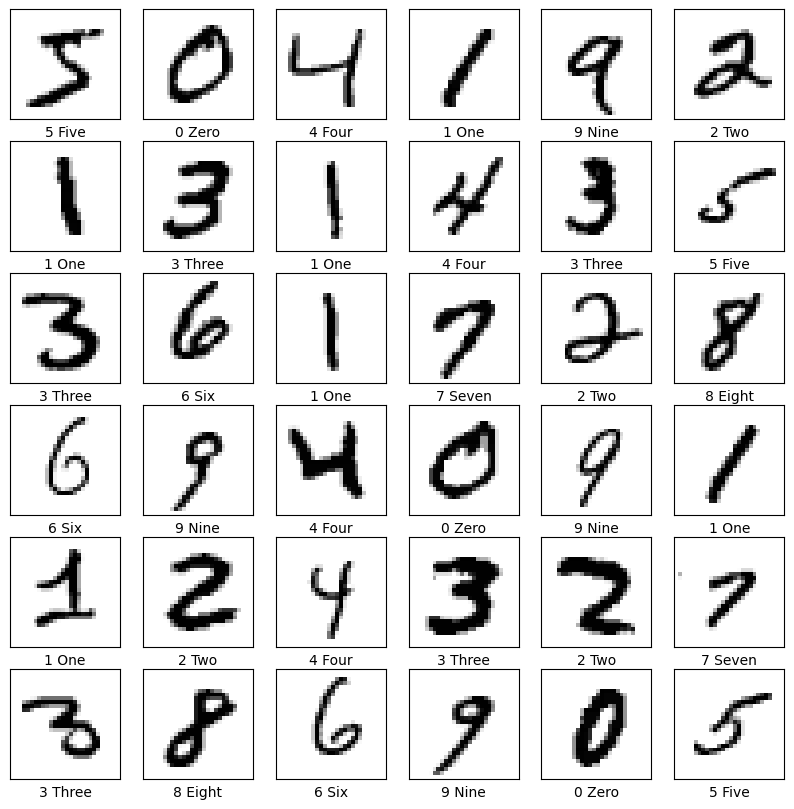

In [ ]:
#the first 36 images from traing set
class_names =['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
import pandas as pd
mnist=keras.datasets.mnist # Loading the dataset
(xtrain,ytrain),(xtest,ytest)= mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(36): # 25 images
  plt.subplot(6,6,i+1) # matrix of 5 X 5 array
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(xtrain[i], cmap=plt.cm.binary) # printing binary/black and white image
  plt.xlabel("%s %s" % (ytrain[i], class_names[ytrain[i]])) # Assigning name to each image
plt.show()

# Helper Functions

In [ ]:
import pandas as pd
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy.stats import uniform

X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)

In [ ]:
def evaluate_model_gd(X_train, y_train, X_test, y_test, model, params, k=5):
  """
  model: the classification model being implemented here
  params: the matrix consisting of parameters to be tested for hyperparameter tuning
  k: the no. of folds for cross validation (default value = 5)
  """
  kf = KFold(n_splits=k, random_state=None)

  acc_score_v = []
  f1_score_v = []
  prec_v = []
  log_loss_v = []
  recall_v = []

  # make separate lists for other evaluation metrics here
  print('tuning started: GridSearchCV')
  grid_search = GridSearchCV(estimator= model, param_grid=params, scoring='accuracy', cv=k)
  grid_search.fit(X_train, y_train)
  print('found best model through exhaustive search!')
  model = grid_search.best_estimator_
  y_pred = model.predict(X_test)
  df = pd.DataFrame(grid_search.cv_results_)
  print(df[['params','mean_test_score']])
  acc = accuracy_score(y_pred , y_test)
  f1 = f1_score(y_pred , y_test, average='macro')
  precision = precision_score(y_pred , y_test, average='macro')
  #log = log_loss(pred_values2 , y_test_v, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  rec = recall_score(y_pred , y_test, average='macro')

  print(f'The best accuracy is achieved with hyperparameters: {grid_search.best_params_}')
  print('Testing accuracy : {}'.format(acc))
  print('Testing f1 score : {}'.format(f1))
  print('Testing precision : {}'.format(precision))
  print('Testing recall score : {}'.format(rec))
  #print('Testing log loss : {}'.format(log))



In [ ]:
def evaluate_model_rd(X_train, y_train, X_test, y_test, model, params, k=5):
  """
  model: the classification model being implemented here
  params: the matrix consisting of parameters to be tested for hyperparameter tuning
  k: the no. of folds for cross validation (default value = 5)
  """
  kf = KFold(n_splits=k, random_state=None)

  # make separate lists for other evaluation metrics here
  print('tuning started: RandomizedSearchCV')
  clf = RandomizedSearchCV(estimator=model, param_distributions=params, scoring='accuracy', random_state=0, cv=k)
  search = clf.fit(X_train, y_train)
  print('found best model through parameter search!')
  model = search.best_estimator_

  y_pred = model.predict(X_test)
  df = pd.DataFrame(search.cv_results_)
  print(df[['params','mean_test_score']])
  acc = accuracy_score(y_pred , y_test)
  f1 = f1_score(y_pred , y_test, average='macro')
  precision = precision_score(y_pred , y_test, average='macro')
  #log = log_loss(pred_values2 , y_test_v, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  rec = recall_score(y_pred , y_test, average='macro')
  print(f'The best accuracy is achieved with hyperparameters: {search.best_params_}')
  print('Testing accuracy : {}'.format(acc))
  print('Testing f1 score : {}'.format(f1))
  print('Testing precision : {}'.format(precision))
  print('Testing recall score : {}'.format(rec))
  #print('Testing log loss : {}'.format(log))


In [ ]:
def evaluate_model_cv(X_train, y_train, X_test, y_test, model, params, k=5):
  print('starting cross_val')
  kf = KFold(n_splits=k, random_state=None)

  acc_score_v = []
  f1_score_v = []
  prec_v = []
  log_loss_v = []
  recall_v = []
  for train_index , test_index in kf.split(X_train):
      X_train_v , X_test_v = X_train.iloc[train_index,:],X_train.iloc[test_index,:]
      y_train_v , y_test_v = y_train[train_index] , y_train[test_index]
      model.fit(X_train_v,y_train_v)
      pred_values = model.predict(X_test_v)

      acc_v = accuracy_score(pred_values , y_test_v)
      f1_v = f1_score(pred_values , y_test_v, average='macro')
      precision_v = precision_score(pred_values , y_test_v, average='macro')
      #log_v = log_loss(pred_values , y_test_v, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
      rec_v = recall_score(pred_values , y_test_v, average='macro')

      # add any other evaluation metric here
      acc_score_v.append(acc_v)
      f1_score_v.append(f1_v)
      prec_v.append(precision_v)
      #log_loss_v.append(log_v)
      recall_v.append(rec_v)

  print('cross_val ended')

  avg_val_acc_score = sum(acc_score_v)/k
  avg_f1_score_v = sum(f1_score_v)/k
  avg_prec_v = sum(prec_v)/k
  #avg_log_loss_v = sum(log_loss_v)/k
  avg_recall_v = sum(recall_v)/k

  pred_values2 = model.predict(X_test)

  acc = accuracy_score(pred_values2 , y_test)
  f1 = f1_score(pred_values2 , y_test, average='macro')
  precision = precision_score(pred_values2 , y_test, average='macro')
  #log = log_loss(pred_values2 , y_test_v, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
  rec = recall_score(pred_values2 , y_test, average='macro')

  #print('validation accuracy of each fold - {}'.format(acc_score))
  print('Avg validation accuracy : {}'.format(avg_val_acc_score))
  print('Avg validation f1 score : {}'.format(avg_f1_score_v))
  print('Avg validation precision score : {}'.format(avg_prec_v))
  print('Avg validation recall score : {}'.format(avg_recall_v))
  #print('Avg validation  : {}'.format(avg_f1_score_v))

  print('Testing accuracy : {}'.format(acc))
  print('Testing f1 score : {}'.format(f1))
  print('Testing precision : {}'.format(precision))
  print('Testing recall score : {}'.format(rec))
  #print('Testing log loss : {}'.format(log))


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import uniform
params = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

params2 = {
    'max_depth': [5, 7, 9, 11, 13, 15],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4]
}

y_train=y_train.values.flatten()
y_test=y_test.values.flatten()
model = DecisionTreeClassifier(random_state=42)
evaluate_model_gd(X_train, y_train, X_test, y_test, model, params, 5)
print()
evaluate_model_rd(X_train, y_train, X_test, y_test, model, params2, 5)
print()
evaluate_model_cv(X_train, y_train, X_test, y_test, model, params2, 5)


tuning started: GridSearchCV
found best model through exhaustive search!
                                               params  mean_test_score
0   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.660250
1   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.660250
2   {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.660250
3   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.660250
4   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.660250
5   {'max_depth': 5, 'min_samples_leaf': 2, 'min_s...         0.660250
6   {'max_depth': 5, 'min_samples_leaf': 4, 'min_s...         0.660250
7   {'max_depth': 5, 'min_samples_leaf': 4, 'min_s...         0.660250
8   {'max_depth': 5, 'min_samples_leaf': 4, 'min_s...         0.660250
9   {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.852036
10  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.850911
11  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.850964
12  

# Random Forest

In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
params3 = {
    'max_depth': [5, 7, 10, 13, 15],
    'n_estimators': [30, 35, 40, 45, 50, 55, 60]
}

params4 = {
    'max_depth': [5, 7, 9, 11, 13, 15],
    'n_estimators': [30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80]
}
model = RandomForestClassifier(random_state=42)
evaluate_model_gd(X_train, y_train, X_test, y_test, model, params3, 5)
evaluate_model_rd(X_train, y_train, X_test, y_test, model, params4, 5)
evaluate_model_cv(X_train, y_train, X_test, y_test, model, params4, 5)

tuning started: GridSearchCV
found best model through exhaustive search!
                                   params  mean_test_score
0    {'max_depth': 5, 'n_estimators': 30}         0.845357
1    {'max_depth': 5, 'n_estimators': 35}         0.847214
2    {'max_depth': 5, 'n_estimators': 40}         0.850464
3    {'max_depth': 5, 'n_estimators': 45}         0.852196
4    {'max_depth': 5, 'n_estimators': 50}         0.852107
5    {'max_depth': 5, 'n_estimators': 55}         0.852571
6    {'max_depth': 5, 'n_estimators': 60}         0.854250
7    {'max_depth': 7, 'n_estimators': 30}         0.900696
8    {'max_depth': 7, 'n_estimators': 35}         0.903143
9    {'max_depth': 7, 'n_estimators': 40}         0.904339
10   {'max_depth': 7, 'n_estimators': 45}         0.906125
11   {'max_depth': 7, 'n_estimators': 50}         0.906232
12   {'max_depth': 7, 'n_estimators': 55}         0.907429
13   {'max_depth': 7, 'n_estimators': 60}         0.907411
14  {'max_depth': 10, 'n_estimators': 30} 

# Naive Bayes

In [ ]:
#Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
params5 = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

model = GaussianNB()
evaluate_model_gd(X_train, y_train, X_test, y_test, model, params5, 5)
evaluate_model_rd(X_train, y_train, X_test, y_test, model, params5, 5)
evaluate_model_cv(X_train, y_train, X_test, y_test, model, params5, 5)

tuning started: GridSearchCV
found best model through exhaustive search!
                                       params  mean_test_score
0                      {'var_smoothing': 1.0}         0.732089
1       {'var_smoothing': 0.8111308307896871}         0.742518
2        {'var_smoothing': 0.657933224657568}         0.753018
3        {'var_smoothing': 0.533669923120631}         0.762232
4       {'var_smoothing': 0.4328761281083058}         0.770857
..                                        ...              ...
95  {'var_smoothing': 2.3101297000831578e-09}         0.554107
96   {'var_smoothing': 1.873817422860387e-09}         0.552911
97   {'var_smoothing': 1.519911082952933e-09}         0.551589
98  {'var_smoothing': 1.2328467394420633e-09}         0.550232
99   {'var_smoothing': 9.999999999999999e-10}         0.548946

[100 rows x 2 columns]
The best accuracy is achieved with hyperparameters: {'var_smoothing': 0.06579332246575678}
Testing accuracy : 0.8055
Testing f1 score : 0.803621560

# KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
params5 = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9,10]
}
evaluate_model_gd(X_train, y_train, X_test, y_test, model, params5, 5)
evaluate_model_rd(X_train, y_train, X_test, y_test, model, params5, 5)
evaluate_model_cv(X_train, y_train, X_test, y_test, model, params5, 5)

tuning started: GridSearchCV
found best model through exhaustive search!
                params  mean_test_score
0   {'n_neighbors': 1}         0.969875
1   {'n_neighbors': 2}         0.963339
2   {'n_neighbors': 3}         0.970054
3   {'n_neighbors': 4}         0.968375
4   {'n_neighbors': 5}         0.968768
5   {'n_neighbors': 6}         0.968000
6   {'n_neighbors': 7}         0.967929
7   {'n_neighbors': 8}         0.966625
8   {'n_neighbors': 9}         0.966411
9  {'n_neighbors': 10}         0.965732
The best accuracy is achieved with hyperparameters: {'n_neighbors': 3}
Testing accuracy : 0.9712857142857143
Testing f1 score : 0.9711991586660975
Testing precision : 0.9708657044620269
Testing recall score : 0.9717774214531696
tuning started: RandomizedSearchCV
found best model through parameter search!
                params  mean_test_score
0   {'n_neighbors': 1}         0.969875
1   {'n_neighbors': 2}         0.963339
2   {'n_neighbors': 3}         0.970054
3   {'n_neighbors': 4

# Neural Network Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(random_state=42, max_iter=1000)
params6={
    'hidden_layer_sizes': [10, 30, 40, 50, 70, 100],
    'activation': ['tanh', 'relu']
}

y_train=y_train.values.flatten()
y_test=y_test.values.flatten()
#evaluate_model_gd(X_train, y_train, X_test, y_test, model, params6, 5)
#evaluate_model_rd(X_train, y_train, X_test, y_test, model, params6, 5)
evaluate_model_cv(X_train, y_train, X_test, y_test, model, params6, 5)

tuning started: GridSearchCV
found best model through exhaustive search!
                                               params  mean_test_score
0    {'activation': 'tanh', 'hidden_layer_sizes': 10}         0.883321
1    {'activation': 'tanh', 'hidden_layer_sizes': 30}         0.919911
2    {'activation': 'tanh', 'hidden_layer_sizes': 40}         0.927446
3    {'activation': 'tanh', 'hidden_layer_sizes': 50}         0.932304
4    {'activation': 'tanh', 'hidden_layer_sizes': 70}         0.937393
5   {'activation': 'tanh', 'hidden_layer_sizes': 100}         0.935679
6    {'activation': 'relu', 'hidden_layer_sizes': 10}         0.901071
7    {'activation': 'relu', 'hidden_layer_sizes': 30}         0.933232
8    {'activation': 'relu', 'hidden_layer_sizes': 40}         0.939179
9    {'activation': 'relu', 'hidden_layer_sizes': 50}         0.949446
10   {'activation': 'relu', 'hidden_layer_sizes': 70}         0.959232
11  {'activation': 'relu', 'hidden_layer_sizes': 100}         0.961500
The 